In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import time

In [3]:
train = pd.read_csv('F:/simplilearn/projects/ml projects/income qualification/train.csv') 
test = pd.read_csv('F:/simplilearn/projects/ml projects/income qualification/test.csv') 

In [4]:
train.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,...,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,...,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,...,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,...,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,...,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


In [5]:
test.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq
0,ID_2f6873615,NaN,0,5,0,1,1,0,NaN,1,...,4,0,16,9,0,1,2.25,0.25,272.25,16
1,ID_1c78846d2,NaN,0,5,0,1,1,0,NaN,1,...,41,256,1681,9,0,1,2.25,0.25,272.25,1681
2,ID_e5442cf6a,NaN,0,5,0,1,1,0,NaN,1,...,41,289,1681,9,0,1,2.25,0.25,272.25,1681
3,ID_a8db26a79,NaN,0,14,0,1,1,1,1.0,0,...,59,256,3481,1,256,0,1.00,0.00,256.00,3481
4,ID_a62966799,175000.0,0,4,0,1,1,1,1.0,0,...,18,121,324,1,0,1,0.25,64.00,NaN,324


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Columns: 143 entries, Id to Target
dtypes: float64(8), int64(130), object(5)
memory usage: 10.4+ MB


In [7]:
train.select_dtypes('int64').head()

,hacdor,rooms,hacapo,v14a,refrig,v18q,r4h1,r4h2,r4h3,r4m1,...,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,agesq,Target
0,0,3,0,1,1,0,0,1,1,0,...,1,0,43,100,1849,1,100,0,1849,4
1,0,4,0,1,1,1,0,1,1,0,...,1,0,67,144,4489,1,144,0,4489,4
2,0,8,0,1,1,0,0,0,0,0,...,1,0,92,121,8464,1,0,0,8464,4
3,0,5,0,1,1,1,0,2,2,1,...,1,0,17,81,289,16,121,4,289,4
4,0,5,0,1,1,1,0,2,2,1,...,1,0,37,121,1369,16,121,4,1369,4


In [8]:
train.select_dtypes('float64').head()

,v2a1,v18q1,rez_esc,meaneduc,overcrowding,SQBovercrowding,SQBdependency,SQBmeaned
0,190000.0,NaN,NaN,10.0,1.000000,1.000000,0.0,100.0
1,135000.0,1.0,NaN,12.0,1.000000,1.000000,64.0,144.0
2,NaN,NaN,NaN,11.0,0.500000,0.250000,64.0,121.0
3,180000.0,1.0,1.0,11.0,1.333333,1.777778,1.0,121.0
4,180000.0,1.0,NaN,11.0,1.333333,1.777778,1.0,121.0


In [9]:
# three coluumns have mixed values
train.select_dtypes('object').head()

,Id,idhogar,dependency,edjefe,edjefa
0,ID_279628684,21eb7fcc1,no,10,no
1,ID_f29eb3ddd,0e5d7a658,8,12,no
2,ID_68de51c94,2c7317ea8,8,no,11
3,ID_d671db89c,2b58d945f,yes,11,no
4,ID_d56d6f5f5,2b58d945f,yes,11,no


# check for null values

In [10]:
train.select_dtypes('object').isnull().sum()

Id            0
idhogar       0
dependency    0
edjefe        0
edjefa        0
dtype: int64

In [11]:
int64null = train.select_dtypes('int64').isnull().sum()
int64null[int64null>0]

Series([], dtype: int64)

In [12]:
train.select_dtypes('float64').isnull().sum()

v2a1               6860
v18q1              7342
rez_esc            7928
meaneduc              5
overcrowding          0
SQBovercrowding       0
SQBdependency         0
SQBmeaned             5
dtype: int64

# treating mixed values in dependency , edjefe , edjefa

In [13]:
chg = {'yes':1,'no':0}

for i in [train,test]:
    i['dependency'] = i['dependency'].replace(chg).astype(np.float64)
    i['edjefe'] = i['edjefe'].replace(chg).astype(np.float64)
    i['edjefa'] = i['edjefa'].replace(chg).astype(np.float64)

# treating null values in astype = float64 columns

In [14]:
# for v2a1

In [15]:
#cols = [i for i in train if i.startswith('tipo')]
cols = ['tipovivi1','tipovivi2','tipovivi3','tipovivi4','tipovivi5']
train[cols].head()

,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5
0,0,0,1,0,0
1,0,0,1,0,0
2,1,0,0,0,0
3,0,0,1,0,0
4,0,0,1,0,0


In [16]:
# dd = train[train['v2a1'].isnull()][cols].sum()
dd = train.loc[train['v2a1'].isnull(),cols].sum()
dd

tipovivi1    5911
tipovivi2       0
tipovivi3       0
tipovivi4     163
tipovivi5     786
dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

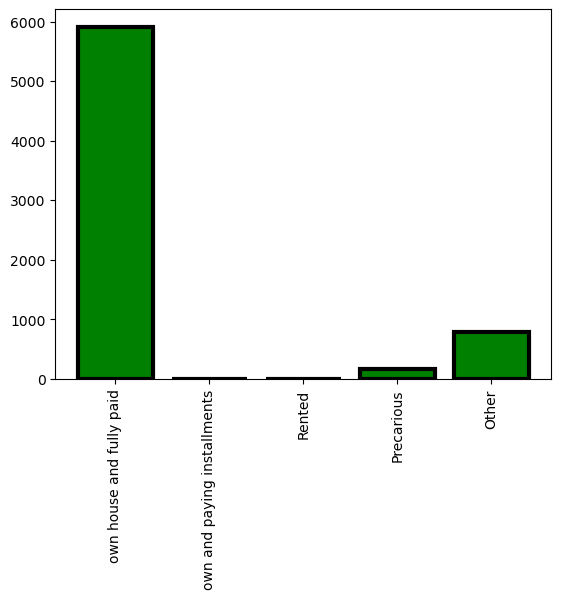

In [17]:
plt.bar(['own house and fully paid','own and paying installments','Rented', 'Precarious', 'Other'],dd,color = 'green',edgecolor = 'k',linewidth = 3)
plt.xticks(rotation = 90)
plt.show()

In [18]:
for i in [train,test]:
    i['v2a1'].fillna(0,inplace=True)

In [19]:
train['v2a1'].isnull().sum()

0

In [20]:
# treating missing values for v18q1(how many tablets the house hold has)
train['v18q1'].isnull().sum()

7342

In [21]:
# columns relreating to v18q1 is v18q (if house has no talbets :0 , if they have tablets 1)
# if v18q1 is 0 then v18q1 will also be zero because if the hold doesnt own a ny tablet then the number of tablets he has is  0
train[train['v18q1'].isnull()]['v18q'].value_counts()

0    7342
Name: v18q, dtype: int64

In [22]:
gg = train['v18q1'].value_counts()
gg

1.0    1586
2.0     444
3.0     129
4.0      37
5.0      13
6.0       6
Name: v18q1, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

(0.0, 1800.0)

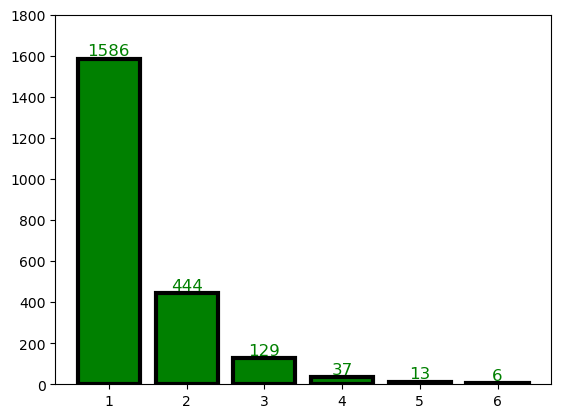

In [23]:
plt.bar(gg.index.astype('int64'),gg.values,color= 'green',linewidth = 3,edgecolor = 'k')
for i in range(1,len(gg)+1):
    plt.text(i,gg[i],gg[i],ha = 'center',va = 'bottom',color='green',fontsize=12)
plt.ylim(0,1800)

In [24]:
for i in [train,test]:
    i['v18q1'].fillna(0,inplace=True)

In [25]:
train['v18q1'].isnull().sum()

0

In [26]:
# treating null values for rez_esc(years behind in school) and the columns releated to it is 'age'

In [27]:
train['rez_esc'].unique()

array([nan,  1.,  0.,  3.,  2.,  4.,  5.])

In [28]:
train['rez_esc'].describe()

count    1629.000000
mean        0.459791
std         0.946550
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         5.000000
Name: rez_esc, dtype: float64

In [29]:
train[(train['rez_esc'].isnull())]['age'].describe()

count    7928.000000
mean       38.833249
std        20.989486
min         0.000000
25%        24.000000
50%        38.000000
75%        54.000000
max        97.000000
Name: age, dtype: float64

In [30]:
train[(train['rez_esc'].notnull())]['age'].describe()

count    1629.000000
mean       12.258441
std         3.218325
min         7.000000
25%         9.000000
50%        12.000000
75%        15.000000
max        17.000000
Name: age, dtype: float64

In [31]:
train[(train['rez_esc'].isnull())&((train['age']>=7) & (train['age']<=17))]['age']
# we cannot excatly know why the null values in 'rez_esc' exists because the no sufficient information , so replace them with 0.

2514    10
Name: age, dtype: int64

In [32]:
for i in [train,test]:
    i['rez_esc'].fillna(0,inplace=True)

In [33]:
# treating null values in meaneduc and columns relrated to it are ['edjefe','edjefa','instlevel1','instlevel2','instlevel3']
cols = ['edjefe','edjefa','instlevel1','instlevel2','instlevel3']
train[train['meaneduc'].isnull()][cols]
# we can see that ' instlevel1 ' is 0 , that means they have no education so replcae with 0

,edjefe,edjefa,instlevel1,instlevel2,instlevel3
1291,0.0,10.0,0,0,0
1840,4.0,0.0,0,0,1
1841,4.0,0.0,0,1,0
2049,12.0,0.0,0,0,0
2050,12.0,0.0,0,0,0


In [34]:
for i in [train,test]:
    i['meaneduc'].fillna(0,inplace=True)

In [35]:
# treating null values for 'SQBmeaned' and columns releated are 'meaneduc'
train[train['SQBmeaned'].isnull()][['instlevel1','instlevel2']]
# we can see that 'instlevel1' is 0 for null values in 'SQBmeaned' . so  that means when the education is 0 , the square of years of education is evenutally 0

,instlevel1,instlevel2
1291,0,0
1840,0,0
1841,0,1
2049,0,0
2050,0,0


In [36]:
for i in [train,test]:
    i['SQBmeaned'].fillna(0,inplace=True)

# fixing the issue of same household belonging to different targets

In [37]:
equal = train.groupby('idhogar')['Target'].apply(lambda x: x.nunique() !=1)

In [38]:
not_equal = equal[equal==True]
not_equal

idhogar
0172ab1d9    True
03f4e5f4d    True
0511912b6    True
078a0b6e2    True
09e25d616    True
             ... 
e65d4b943    True
efd3aec61    True
f006348ed    True
f7b421c2c    True
f94589d38    True
Name: Target, Length: 85, dtype: bool

In [39]:
# lets check
train[train['idhogar']==not_equal.index[0]][['idhogar','parentesco1','Target']]

,idhogar,parentesco1,Target
7651,0172ab1d9,0,3
7652,0172ab1d9,0,2
7653,0172ab1d9,0,3
7654,0172ab1d9,1,3
7655,0172ab1d9,0,2


In [40]:
idhopar = train.groupby('idhogar')['parentesco1'].sum()
idhopar

idhogar
001ff74ca    1
003123ec2    1
004616164    1
004983866    1
005905417    1
            ..
ff9343a35    1
ff9d5ab17    1
ffae4a097    1
ffe90d46f    1
fff7d6be1    1
Name: parentesco1, Length: 2988, dtype: int64

In [41]:
no_heads = idhopar[idhopar==0]
no_heads

idhogar
03c6bdf85    0
09b195e7a    0
1367ab31d    0
1bc617b23    0
374ca5a19    0
61c10e099    0
6b1b2405f    0
896fe6d3e    0
a0812ef17    0
ad687ad89    0
b1f4d89d7    0
bfd5067c2    0
c0c8a5013    0
d363d9183    0
f2bfa75c4    0
Name: parentesco1, dtype: int64

In [42]:
train[train['idhogar'].isin(no_heads.index)].groupby('idhogar')['Target'].apply(lambda x :x.nunique()==1)

idhogar
03c6bdf85    True
09b195e7a    True
1367ab31d    True
1bc617b23    True
374ca5a19    True
61c10e099    True
6b1b2405f    True
896fe6d3e    True
a0812ef17    True
ad687ad89    True
b1f4d89d7    True
bfd5067c2    True
c0c8a5013    True
d363d9183    True
f2bfa75c4    True
Name: Target, dtype: bool

In [43]:
# nowas we know that households with no heads do not have different targets
# now lets fix the different targets for house holds

In [44]:
for household in not_equal.index:
    truetar = int(train[(train['idhogar']==household) & (train['parentesco1']==1.0)]['Target'])
    
    train.loc[train['idhogar']==household , 'Target'] = truetar

In [45]:
equal = train.groupby('idhogar')['Target'].apply(lambda x : x.nunique()==1)

In [46]:
equal[equal!=True]
# now we can see that np household is belonging to diffenret targets

Series([], Name: Target, dtype: bool)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

1     774
2    1558
3    1221
4    6004
Name: Target, dtype: int64


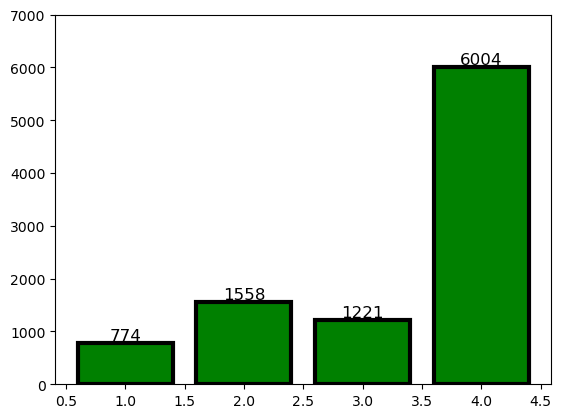

In [47]:
# plot the targets
zx = train.Target.value_counts().sort_index()
plt.bar(zx.index.astype('int64'),zx,color = 'green',edgecolor='k',linewidth=3)
for i in range(1,len(zx)+1):
    plt.text(i,zx[i],zx[i],ha = 'center',va = 'bottom',color='black',fontsize=12)
plt.ylim(0,7000)    
print(zx)

In [48]:
# we have columns in dataset that are just squares of existing columns and now we dont need them
cols=['SQBescolari', 'SQBage', 'SQBhogar_total', 'SQBedjefe', 
        'SQBhogar_nin', 'SQBovercrowding', 'SQBdependency', 'SQBmeaned', 'agesq']
print(train.shape,'    ',test.shape)

for i in [train,test]:
    i.drop(columns = cols,inplace=True)
    
print(train.shape,'    ',test.shape)

(9557, 143)      (23856, 142)
(9557, 134)      (23856, 133)


In [49]:
# dropping columns with high collinearity
train.select_dtypes('object').columns

Index(['Id', 'idhogar'], dtype='object')

In [50]:
ycorr = train.drop(columns=['Id','idhogar']).corr()[['Target']]

In [51]:
cols_lowrelated_target = ycorr[(ycorr['Target']<0.05) & (ycorr['Target']>-0.05)].index
cols_lowrelated_target

Index(['r4h3', 'r4m2', 'paredfibras', 'paredother', 'pisoother', 'techozinc',
       'techoentrepiso', 'techocane', 'techootro', 'public', 'planpri',
       'noelec', 'coopele', 'sanitario1', 'sanitario3', 'sanitario6',
       'energcocinar1', 'elimbasu4', 'elimbasu6', 'male', 'female',
       'estadocivil2', 'estadocivil5', 'estadocivil6', 'estadocivil7',
       'parentesco1', 'parentesco4', 'parentesco5', 'parentesco7',
       'parentesco8', 'parentesco9', 'parentesco10', 'parentesco11',
       'parentesco12', 'hogar_mayor', 'edjefa', 'instlevel3', 'instlevel4',
       'instlevel6', 'instlevel7', 'tipovivi1', 'tipovivi3', 'lugar2',
       'lugar6'],
      dtype='object')

In [52]:
for i in [train,test]:
    i.drop(columns = cols_lowrelated_target,inplace=True)

In [53]:
train.shape

(9557, 90)

In [54]:
def rmvhighcorr(x,thr):
    names = set()
    df = x.corr()
    for i in range(len(x.columns)):
        for j in range(i):
            if df.iloc[i,j]>thr or df.iloc[i,j]<-thr:
                names.add(df.columns[i])
    return names

In [55]:
high_corr = rmvhighcorr(train.drop(columns = ['Id','idhogar','Target']),0.95)
high_corr

{'area2', 'hhsize', 'hogar_total', 'tamhog'}

In [56]:
for  i in [train,test]:
    i.drop(columns = high_corr,inplace=True)

In [57]:
train.shape

(9557, 86)

In [58]:
test.shape

(23856, 85)

In [59]:
train['v2a1'].describe()

count    9.557000e+03
mean     4.662861e+04
std      1.091671e+05
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      4.500000e+04
max      2.353477e+06
Name: v2a1, dtype: float64

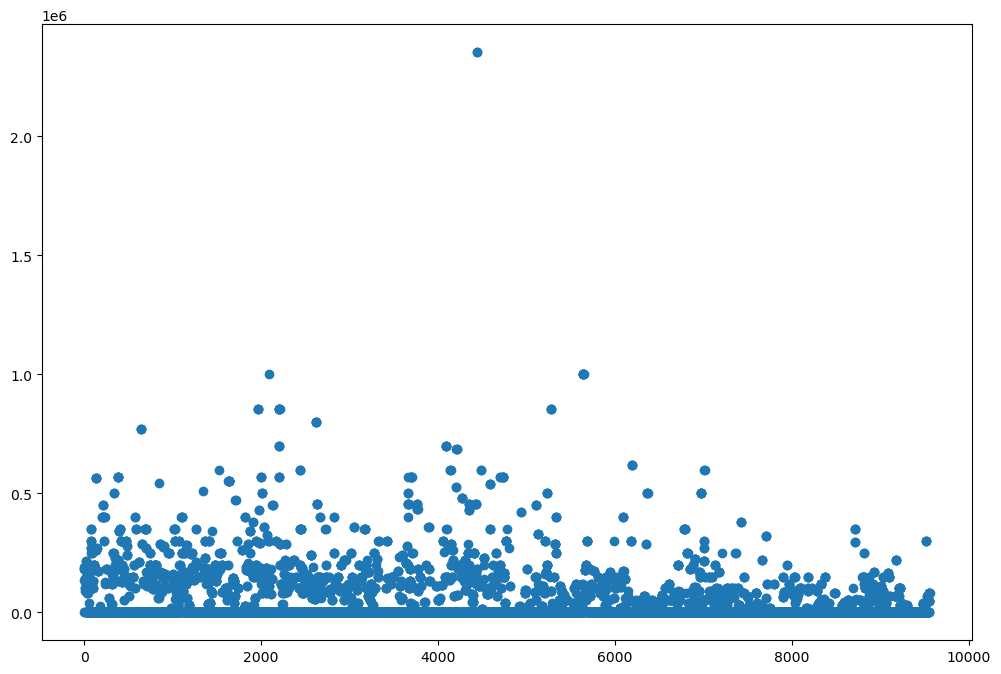

In [60]:
import matplotlib.pyplot as plt
plt.figure(figsize = (12,8))
plt.scatter(train.index,train['v2a1'])

In [61]:
# if the outliers are to be removed
# def outlier(x):
#     indlist = set()
#     for i in x.columns:
#         if x[i].dtype=='int64' or x[i].dtype=='float64':
#             q1 = x[i].quantile(0.25)
#             q3 = x[i].quantile(0.75)
#             iqr = q3-q1
#             low  = q1-(1.5*iqr)
#             hi = q3+(1.5*iqr)
            
#             z =x[(x[i]<(q1-1.5*iqr)) | (x[i]>(q3+1.5*iqr))].index
            
#             for i in z :
#                 indlist.add(i)

#     return (indlist)

In [62]:
# rows_to_remove = outlier(train[['v2a1']])

In [63]:
# len(train)

In [64]:
# train.drop(rows_to_remove,axis=0,inplace=True)

In [65]:
# replacing outliers with median
for i in ['v2a1']:
    if train[i].dtypes=='int64' or  train[i].dtypes=='float64':
        q1 = train[i].quantile(0.25)
        q3 = train[i].quantile(0.75)
        iqr = q3-q1
        low = q1-(1.5*iqr)
        hi = q3+(1.5*iqr)
        train[i] = np.where((train[i]<low)|(train[i]>hi),train[i].median(),train[i])

In [66]:
train['v2a1'].describe()

count      9557.000000
mean       8046.272784
std       23914.631318
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      110000.000000
Name: v2a1, dtype: float64

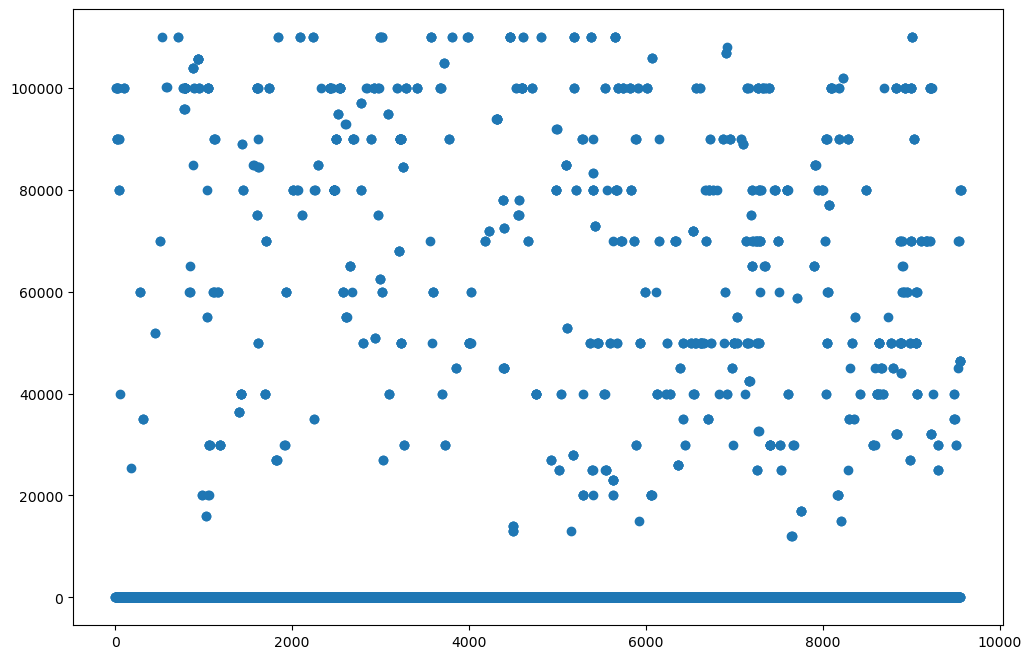

In [67]:
import matplotlib.pyplot as plt
plt.figure(figsize = (12,8))
plt.scatter(train.index,train['v2a1'])

In [68]:
y = train['Target']
x = train.drop(['Id','Target','idhogar'],axis=1)
test_id = test[['Id']]
test.drop(columns= ['Id','idhogar'],inplace=True)

In [69]:
y.value_counts()

4    6004
2    1558
3    1221
1     774
Name: Target, dtype: int64

In [70]:
# we have seen that th edata is imbalanced looking at value counts in output label, so lets balance them with smote

In [71]:
from imblearn.over_sampling import SMOTE

In [72]:
sm = SMOTE(random_state = 123)
x_sm , y_sm = sm.fit_resample(x,y)

In [73]:
print(y_sm.value_counts())

4    6004
2    6004
3    6004
1    6004
Name: Target, dtype: int64


In [74]:
x_sm.shape

(24016, 83)

In [75]:
x_sm

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,...,computer,television,mobilephone,qmobilephone,lugar1,lugar3,lugar4,lugar5,area1,age
0,0.0,0,3,0,1,1,0,0.00000,0,1,...,0,0,1,1,1,0,0,0,1,43
1,0.0,0,4,0,1,1,1,1.00000,0,1,...,0,0,1,1,1,0,0,0,1,67
2,0.0,0,8,0,1,1,0,0.00000,0,0,...,0,0,0,0,1,0,0,0,1,92
3,0.0,0,5,0,1,1,1,1.00000,0,2,...,0,0,1,3,1,0,0,0,1,17
4,0.0,0,5,0,1,1,1,1.00000,0,2,...,0,0,1,3,1,0,0,0,1,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24011,0.0,0,5,0,1,1,0,0.00000,0,0,...,0,0,0,0,1,0,0,0,0,72
24012,0.0,0,6,0,1,1,0,0.00000,0,1,...,0,0,1,1,1,0,0,0,1,29
24013,0.0,0,5,0,1,0,0,0.00000,0,2,...,0,0,1,2,0,0,0,0,0,21
24014,0.0,0,4,0,1,1,0,0.00000,0,1,...,0,0,1,3,1,0,0,0,0,16


In [76]:
from sklearn.preprocessing import StandardScaler as ss_

ss = ss_()
ss.fit(x_sm)
x_sc = ss.transform(x_sm)
test_sc = ss.transform(test)

In [77]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.95)
pca.fit_transform(x_sc,y_sm)

array([[-2.10581834, -3.2651665 , -0.12851159, ..., -0.15281678,
        -0.34838819,  0.10893467],
       [-2.83511931, -2.74843466,  0.51202326, ...,  0.09258678,
         0.42971508, -0.04196868],
       [-3.67420557, -3.06957089, -0.39634891, ..., -0.14019428,
         0.16067551,  0.19788542],
       ...,
       [ 0.91342988, -0.20419957,  1.9742752 , ...,  0.10711725,
         1.11102819,  0.19123832],
       [-1.20239063, -0.01927696, -0.62064954, ...,  0.18981501,
         0.05906553,  1.54139267],
       [-2.92859403,  0.88193236, -0.31157978, ..., -0.49088014,
         1.0603483 , -0.80430904]])

In [78]:
pca.n_components_

60

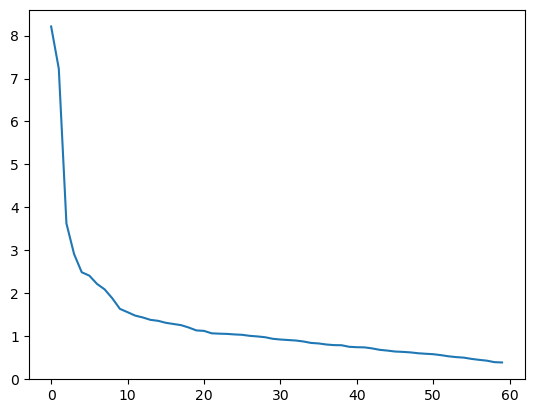

In [79]:
plt.plot(pca.explained_variance_)

In [80]:
pca1 = PCA(n_components= 60)
pca1.fit(x_sc,y_sm)
x_pca =  pca1.transform(x_sc)
test_pca = pca1.transform(test_sc)

In [81]:
from  sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test = tts(x_pca,y_sm,test_size = 0.25,stratify=y_sm,random_state=123)

#  using basic Random Forest Classifier

In [82]:
from sklearn.ensemble import RandomForestClassifier as rfc_
from sklearn.metrics import accuracy_score as acs,confusion_matrix as cm ,f1_score as f1,classification_report as cr
rfc = rfc_(random_state=123)
start = time.time()
rfc.fit(x_train,y_train)
print(f'it took {(time.time()-start)/60} minutes for training')

it took 0.4131682594617208 minutes for training


In [83]:
print(acs(y_train,rfc.predict(x_train)))
print(acs(y_test,rfc.predict(x_test)))

1.0
0.8850766155896069


In [84]:
print(cm(y_train,rfc.predict(x_train)))
print(cm(y_test,rfc.predict(x_test)))

[[4503    0    0    0]
 [   0 4503    0    0]
 [   0    0 4503    0]
 [   0    0    0 4503]]
[[1382   47   35   37]
 [  54 1260   76  111]
 [  36   84 1265  116]
 [  13   55   26 1407]]


In [85]:
print(cr(y_train,rfc.predict(x_train)))
print(cr(y_test,rfc.predict(x_test)))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      4503
           2       1.00      1.00      1.00      4503
           3       1.00      1.00      1.00      4503
           4       1.00      1.00      1.00      4503

    accuracy                           1.00     18012
   macro avg       1.00      1.00      1.00     18012
weighted avg       1.00      1.00      1.00     18012

              precision    recall  f1-score   support

           1       0.93      0.92      0.93      1501
           2       0.87      0.84      0.86      1501
           3       0.90      0.84      0.87      1501
           4       0.84      0.94      0.89      1501

    accuracy                           0.89      6004
   macro avg       0.89      0.89      0.88      6004
weighted avg       0.89      0.89      0.88      6004




#  rfc using grid search cv

In [86]:
from sklearn.model_selection import GridSearchCV , cross_val_score , RandomizedSearchCV

param_grid = { 
    'n_estimators': [int(x) for x in np.linspace(start = 10, stop = 100, num = 10)],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy'],
    'bootstrap' : [True, False]
}

In [ ]:
rfc = rfc_(random_state = 123,n_jobs=-1)

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5,n_jobs=-1)
start = time.time()
CV_rfc.fit(x_train, y_train)
print(f'it took {(time.time()-start)/60} minutes for training')

In [ ]:
CV_rfc.best_params_

In [ ]:
print(acs(y_train,CV_rfc.predict(x_train)))
print(acs(y_test,CV_rfc.predict(x_test)))

In [ ]:
print(cm(y_train,CV_rfc.predict(x_train)))
print(cm(y_test,CV_rfc.predict(x_test)))

In [ ]:
print(cr(y_train,CV_rfc.predict(x_train)))
print(cr(y_test,CV_rfc.predict(x_test)))

#  using RandomSearchCV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = { 
    'n_estimators': [int(x) for x in np.linspace(start = 10, stop = 100, num = 10)],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy'],
    'bootstrap' : [True, False]
}

rfc = rfc_(random_state = 123)

rsc_rfc = RandomizedSearchCV(estimator=rfc, param_distributions=param_grid, cv= 10,n_jobs=-1)
start = time.time()
rsc_rfc.fit(x_train, y_train)
print(f'it took {(time.time()-start)/60} minutes for training')

In [ ]:
print(acs(y_train,rsc_rfc.predict(x_train)))
print(acs(y_test,rsc_rfc.predict(x_test)))

In [ ]:
print(cm(y_train,rsc_rfc.predict(x_train)))
print(cm(y_test,rsc_rfc.predict(x_test)))

In [ ]:
print(cr(y_train,rsc_rfc.predict(x_train)))
print(cr(y_test,rsc_rfc.predict(x_test)))

# submission dataset

In [ ]:
# prediction of sebmission test set
# the basic random forest model makes better predctions

In [ ]:
submission = pd.DatFrame()
submission['ID'] = test_ID['ID']

In [ ]:
predictions = .predict(test_sc)

In [ ]:
submission['predictions'] = predictions